# Week 7 - Milestone One week

# 1. Lesson: no lesson this week.  Milestone One is due!

# 2. Weekly graph question

Below are the graphs from last week's weekly graph question.  Suppose you wanted to cause the viewer to examine the last three months of data first.  How could you use preattentive attributes to do that?  Suggest several possibilities.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

/tmp/ipykernel_3212/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

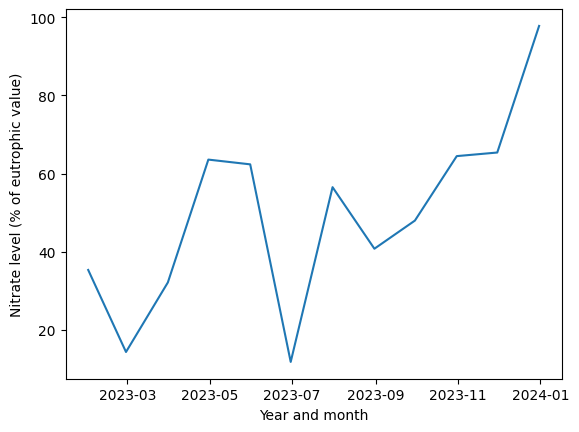

In [3]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/tmp/ipykernel_3212/1012779568.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

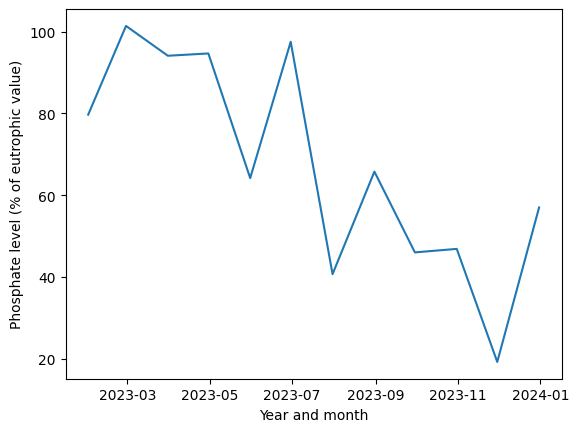

In [4]:
np.random.seed(1)
time_series = 100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

# 3. Working on your datasets

This week, you can work on Milestone One rather than having a particular exercise about working on your datasets

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 99-119 of the Storytelling With Data book as best you can. (The first half of chapter four). You do not have to get the exact data values right, just the overall look and feel.

Loaded Organized Generation: 496774 rows, 7 columns
Loaded States: 51 rows, 3 columns
Loaded IRENA Renewable Energy: 35193 rows, 12 columns

Dataset: Organized Generation
Total Rows: 496774, Total Columns: 7
Column Names: ['Unnamed: 0', 'YEAR', 'MONTH', 'STATE', 'TYPE OF PRODUCER', 'ENERGY SOURCE', 'GENERATION (Megawatthours)']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496774 entries, 0 to 496773
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  496774 non-null  int64  
 1   YEAR                        496774 non-null  int64  
 2   MONTH                       496774 non-null  int64  
 3   STATE                       496774 non-null  object 
 4   TYPE OF PRODUCER            496774 non-null  object 
 5   ENERGY SOURCE               496774 non-null  object 
 6   GENERATION (Megawatthours)  496774 non-null  float64
dtypes: float64(1), int64(3), object(3

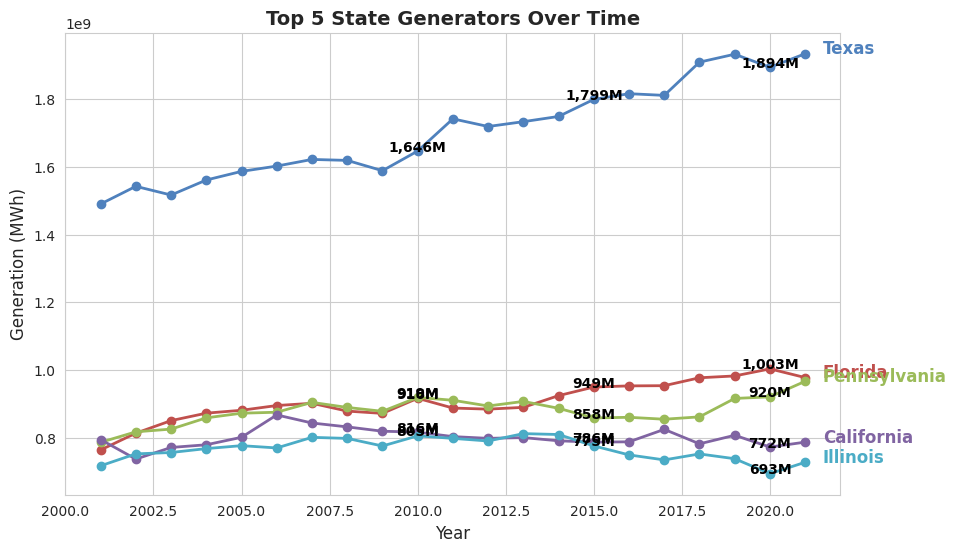

In [ ]:
# Here we are highlighting page 115 of the book, which explains the use of labels to draw attention in such cases of critical points in the data and the use of color to differentiate between different data points, 
# as we well as the use of color differentiation and reduction of legend clutter by directly labeling the data points on the graph.
# ===========================
# Import Libraries
# ===========================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# ===========================
# File Imports & Summary Stats
# ===========================

# Define base path for loading datasets
base_path = "./Datasets/"

# Dictionary mapping dataset names to CSV files
csv_files = {
    "Organized Generation": "organised_Gen.csv",
    "States": "states.csv",
    "IRENA Renewable Energy": "IRENA_RenewableEnergy_Statistics_2000-2022.csv"
}

# Load datasets into a dictionary
datasets = {}
for name, file in csv_files.items():
    encoding = "ISO-8859-1" if "IRENA" in name else "utf-8"  # Fix encoding for IRENA dataset
    file_path = os.path.join(base_path, file)
    
    if os.path.exists(file_path):
        datasets[name] = pd.read_csv(file_path, encoding=encoding)
        print(f"Loaded {name}: {datasets[name].shape[0]} rows, {datasets[name].shape[1]} columns")
    else:
        print(f"Warning: File not found -> {file}")

# Display dataset summaries
for name, df in datasets.items():
    print(f"\nDataset: {name}")
    print(f"Total Rows: {df.shape[0]}, Total Columns: {df.shape[1]}")
    print("Column Names:", list(df.columns))
    print(df.info(), "\n")
    print(df.head(), "\n")

# ===========================
# Data Cleaning & Mapping
# ===========================

# Standardize column names
datasets["Organized Generation"].rename(columns={
    "GENERATION (Megawatthours)": "Generation_MWh",
    "ENERGY SOURCE": "Energy_Source",
    "TYPE OF PRODUCER": "Producer_Type",
    "YEAR": "Year",
    "MONTH": "Month",
    "STATE": "State"
}, inplace=True)

datasets["IRENA Renewable Energy"].rename(columns={
    "Electricity Generation (GWh)": "Generation_GWh",
    "Electricity Installed Capacity (MW)": "Installed_Capacity_MW",
    "Year": "Year",
    "Country": "Country",
    "Technology": "Technology"
}, inplace=True)

# Rename columns in States dataset
datasets["States"].rename(columns={"Code": "State_Abbreviation"}, inplace=True)

# Map state abbreviations to full names
state_mapping = datasets["States"].set_index("State_Abbreviation")["State"].to_dict()
datasets["Organized Generation"]["State_Full"] = datasets["Organized Generation"]["State"].map(state_mapping)

print("State mapping applied.")

# ===========================
# Data Cleaning & Handling Missing Values
# ===========================

# Remove rows where 'State', 'Year', 'Month', 'Energy_Source', or 'Generation_MWh' are missing
required_fields = ["State", "Year", "Month", "Energy_Source", "Generation_MWh"]
before_removal = len(datasets["Organized Generation"])
datasets["Organized Generation"].dropna(subset=required_fields, inplace=True)
after_removal = len(datasets["Organized Generation"])

print(f"Removed {before_removal - after_removal} rows due to missing critical fields.")

# Drop data beyond 2022
datasets["Organized Generation"] = datasets["Organized Generation"][datasets["Organized Generation"]["Year"] <= 2021]
datasets["IRENA Renewable Energy"] = datasets["IRENA Renewable Energy"][datasets["IRENA Renewable Energy"]["Year"] <= 2021]

print("Filtered data to only include records up to 2022.")

# ===========================
# Remove Duplicate Rows
# ===========================

duplicate_count = datasets["Organized Generation"].duplicated().sum()
print(f"Found {duplicate_count} duplicate rows in Organized Generation dataset. Not removed.")

# ===========================
# Visualization: Top 5 States by Generation Over Time
# ===========================

# Group by state and year to get total generation per state per year
state_gen = datasets["Organized Generation"].groupby(["State_Full", "Year"])["Generation_MWh"].sum().reset_index()

# Find the top 5 states with the highest total generation
top_states = state_gen.groupby("State_Full")["Generation_MWh"].sum().nlargest(5).index

# Filter data for only the top 5 states
state_gen = state_gen[state_gen["State_Full"].isin(top_states)]

# Create visualization
plt.figure(figsize=(10, 6))

# Color palette for consistency with the example
colors = ["#4F81BD", "#C0504D", "#9BBB59", "#8064A2", "#4BACC6"]
sns.set_style("whitegrid")

# Plot each state separately
for i, state in enumerate(top_states):
    state_data = state_gen[state_gen["State_Full"] == state]
    plt.plot(state_data["Year"], state_data["Generation_MWh"], label=state, color=colors[i], linewidth=2, marker="o")

# Highlight specific points with text (mimicking the example)
highlight_years = [2010, 2015, 2020]
for state in top_states:
    state_data = state_gen[state_gen["State_Full"] == state]
    filtered_data = state_data[state_data["Year"].isin(highlight_years)]
    for _, row in filtered_data.iterrows():
        plt.text(row["Year"], row["Generation_MWh"], f"{int(row['Generation_MWh']/1e6):,}M", 
                 fontsize=10, color="black", ha="center", fontweight="bold")

# Title & Labels
plt.title("Top 5 State Generators Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Generation (MWh)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remove legend box, label states directly
for i, state in enumerate(top_states):
    state_data = state_gen[state_gen["State_Full"] == state]
    last_year = state_data["Year"].max()
    last_value = state_data[state_data["Year"] == last_year]["Generation_MWh"].values[0]
    plt.text(last_year + 0.5, last_value, state, fontsize=12, color=colors[i], fontweight="bold")

# Show the chart
plt.show()